In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

In [2]:
DATA_DIR_PATH = os.path.join('..', '..', 'data')

def laod_data(file_name):
  file_path = os.path.join(DATA_DIR_PATH, file_name)
  return pd.read_csv(file_path, header=0)

In [3]:
df_train = laod_data('bookmark_train_data.csv')
print(len(df_train))
#df_train.head(3)

199


In [4]:
from sklearn.preprocessing import LabelEncoder

cat_le = LabelEncoder()
cat_le.fit(df_train['category'])

WORD_CLASSE_LABELS = ['その他', 'フィラー', '副詞', '助動詞', '助詞',
                     '動詞', '名詞', '形容詞', '感動詞', '接続詞',
                     '接頭詞', '記号', '連体詞',]
new_wc_columns = {}
for (i, name) in enumerate(WORD_CLASSE_LABELS):
    new_wc_columns['wc_sum_{}'.format(name)] = 'wc_sum_{}'.format(i)
    new_wc_columns['wc_rate_{}'.format(name)] = 'wc_rate_{}'.format(i)


def data_preprocess(df):
    new_df = df.drop(['ncode', 'title', 'bookmark_cat'], axis=1)

    new_df['category'] = cat_le.transform(new_df['category'])

    new_df['rating'] = new_df['rating'] * 10
    new_df = new_df.astype({'rating': 'int32'})

    #wc_columns = [col for col in new_df.columns if col.find('wc_') != -1]
    #new_df = new_df.drop(wc_columns, axis=1)
    new_df = new_df.rename(columns=new_wc_columns)

    kw_columns = [col for col in new_df.columns if col.find('kw_') != -1]
    new_df = new_df.drop(kw_columns, axis=1)

    return new_df

In [5]:
df_train.keys()

Index(['ncode', 'title', 'category', 'bookmark_cat', 'created_at',
       'updated_at', 'char_count_sum', 'new_line_count_sum',
       'talk_char_count_sum', 'new_line_count_rate_sum',
       'talk_char_count_rate_sum', 'char_count_avg', 'new_line_count_avg',
       'talk_char_count_avg', 'new_line_count_rate_avg',
       'talk_char_count_rate_avg', 'wc_sum_その他', 'wc_sum_フィラー', 'wc_sum_副詞',
       'wc_sum_助動詞', 'wc_sum_助詞', 'wc_sum_動詞', 'wc_sum_名詞', 'wc_sum_形容詞',
       'wc_sum_感動詞', 'wc_sum_接続詞', 'wc_sum_接頭詞', 'wc_sum_記号', 'wc_sum_連体詞',
       'wc_rate_その他', 'wc_rate_フィラー', 'wc_rate_副詞', 'wc_rate_助動詞',
       'wc_rate_助詞', 'wc_rate_動詞', 'wc_rate_名詞', 'wc_rate_形容詞', 'wc_rate_感動詞',
       'wc_rate_接続詞', 'wc_rate_接頭詞', 'wc_rate_記号', 'wc_rate_連体詞', 'kw_冒険者',
       'kw_魔王', 'kw_日常', 'kw_成り上がり', 'kw_内政', 'kw_恋愛', 'kw_無双', 'kw_青春',
       'kw_ハーレム', 'kw_男主人公', 'kw_奴隷', 'kw_テンプレ', 'kw_勘違い', 'kw_ほのぼの', 'kw_貴族',
       'kw_ギルド', 'kw_コメディ', 'kw_異世界', 'kw_エルフ', 'kw_ファンタジー', 'kw_オリジナル戦記',
       

In [6]:
df_train2 = data_preprocess(df_train)

In [7]:
df_train2.keys()

Index(['category', 'created_at', 'updated_at', 'char_count_sum',
       'new_line_count_sum', 'talk_char_count_sum', 'new_line_count_rate_sum',
       'talk_char_count_rate_sum', 'char_count_avg', 'new_line_count_avg',
       'talk_char_count_avg', 'new_line_count_rate_avg',
       'talk_char_count_rate_avg', 'wc_sum_0', 'wc_sum_1', 'wc_sum_2',
       'wc_sum_3', 'wc_sum_4', 'wc_sum_5', 'wc_sum_6', 'wc_sum_7', 'wc_sum_8',
       'wc_sum_9', 'wc_sum_10', 'wc_sum_11', 'wc_sum_12', 'wc_rate_0',
       'wc_rate_1', 'wc_rate_2', 'wc_rate_3', 'wc_rate_4', 'wc_rate_5',
       'wc_rate_6', 'wc_rate_7', 'wc_rate_8', 'wc_rate_9', 'wc_rate_10',
       'wc_rate_11', 'wc_rate_12', 'rating'],
      dtype='object')

In [8]:
df_train2.head(3)

,category,created_at,updated_at,char_count_sum,new_line_count_sum,talk_char_count_sum,new_line_count_rate_sum,talk_char_count_rate_sum,char_count_avg,new_line_count_avg,...,wc_rate_4,wc_rate_5,wc_rate_6,wc_rate_7,wc_rate_8,wc_rate_9,wc_rate_10,wc_rate_11,wc_rate_12,rating
0,6,1.586338e+09,1.593468e+09,92340,3840,28950,0.041585,0.313515,3078.0,128.0,...,0.237664,0.226083,0.225076,0.013595,0.006042,0.007049,0.006042,0.144008,0.011078,30
1,6,1.590714e+09,1.593338e+09,77880,4140,4950,0.053159,0.063559,2596.0,138.0,...,0.238590,0.238013,0.217215,0.017909,0.001155,0.010399,0.001155,0.138070,0.013287,40
2,6,1.575176e+09,1.593429e+09,59880,3090,10230,0.051603,0.170842,1996.0,103.0,...,0.240486,0.177328,0.285020,0.014575,0.000000,0.005668,0.008907,0.148178,0.005668,30


In [9]:
X = df_train2.drop(['rating'], axis=1).values
t = df_train2['rating'].values
print(X.shape, t.shape)

(199, 39) (199,)


In [10]:
feature_names = df_train2.keys()[:-1]

In [11]:
from imblearn.over_sampling import RandomOverSampler

In [12]:
ros = RandomOverSampler(random_state=0)
X_resampled, t_resampled = ros.fit_resample(X, t)

print(X_resampled.shape, t_resampled.shape)

u, counts = np.unique(t_resampled, return_counts=True)

print(len(u))
print(u)
print(counts)

(915, 39) (915,)
15
[ 5 10 15 17 20 25 30 35 40 45 50 52 60 67 75]
[61 61 61 61 61 61 61 61 61 61 61 61 61 61 61]


In [13]:
from sklearn.model_selection import train_test_split

#X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.3, shuffle=True, random_state=1)
X_train, X_val, t_train, t_val = train_test_split(X_resampled, t_resampled, test_size=0.3, shuffle=True, random_state=1)

In [14]:
print(X_train.shape, t_train.shape)
print(X_val.shape, t_val.shape)

(640, 39) (640,)
(275, 39) (275,)


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression(C=1.0)

model.fit(X_train, t_train)

LogisticRegression()

In [17]:
print('train: ', model.score(X_train, t_train))
print('val  : ', model.score(X_val, t_val))

train:  0.1875
val  :  0.16363636363636364


In [18]:
y = model.predict(X_val)

In [19]:
print(y[0], t_val[0])

17 17


In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mse = mean_squared_error(t_val, y)
print('RMSE:', math.sqrt(mse))

RMSE: 27.344269800254146


In [22]:
model.coef_

array([[-1.04811120e-15,  2.21121320e-08, -2.11801475e-08,
         3.32928562e-11,  8.18091733e-13,  1.42260145e-11,
        -1.18005269e-19,  2.58103975e-16,  1.10976187e-12,
         2.72697244e-14,  4.74200484e-13, -1.18005269e-19,
         2.58103975e-16,  6.96404724e-15, -5.72825964e-15,
         2.03376359e-12,  2.19390973e-12,  6.67908596e-12,
         6.54658129e-12,  3.77012311e-12,  6.31514259e-14,
         4.50155805e-13,  1.55537754e-13,  6.51819600e-14,
         2.45715472e-12,  1.83825780e-14,  1.39140684e-19,
        -2.96805768e-19,  1.23885021e-17,  4.72069617e-18,
        -5.17358568e-18,  1.11632495e-17, -6.80787527e-17,
        -6.61401828e-18,  5.21397475e-18, -1.70237851e-18,
         4.40097340e-19, -1.51164291e-17, -2.45821304e-18],
       [-1.22977134e-15, -6.68719547e-09,  6.46204651e-09,
         1.13156869e-10,  8.06213358e-12,  5.27258297e-12,
         1.33018537e-17,  3.24620294e-17,  3.77189563e-12,
         2.68737786e-13,  1.75752766e-13,  1.33018537e-

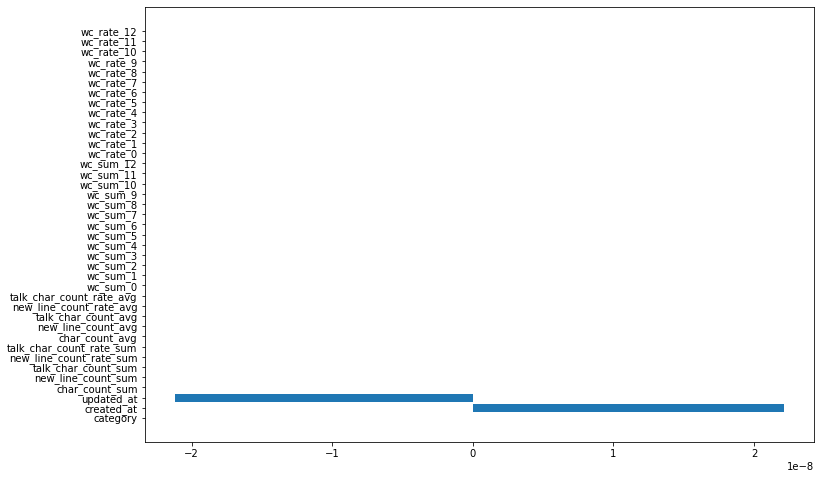

In [24]:
_, ax = plt.subplots(figsize=(12, 8))
ax.barh(feature_names, model.coef_[0])
plt.show()

In [25]:
model.coef_.shape

(15, 39)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [28]:
X_train2 = scaler.transform(X_train)
X_val2 = scaler.transform(X_val)

In [29]:
X_train2

array([[ 1.16036853, -1.36758805, -0.43205256, ...,  2.33119722,
        -0.84319749,  0.5629959 ],
       [-0.1765097 , -0.83391871,  0.46349278, ..., -0.05676729,
        -1.05958621, -1.44568584],
       [-0.1765097 ,  0.30602028,  0.0811936 , ...,  0.54551949,
         1.65748661,  0.2101247 ],
       ...,
       [ 2.49724677, -0.80353418,  0.61251735, ..., -0.45341441,
         0.11229568,  0.29302069],
       [-0.1765097 ,  0.49472678,  0.48358788, ..., -0.33258827,
         0.3554548 , -0.74243098],
       [-0.1765097 ,  1.26786626,  0.6728786 , ..., -0.52097576,
        -1.06386259,  0.69561889]])

In [31]:
df_train3 = pd.DataFrame(X_train2, columns=feature_names)

In [32]:
df_train3.head()

,category,created_at,updated_at,char_count_sum,new_line_count_sum,talk_char_count_sum,new_line_count_rate_sum,talk_char_count_rate_sum,char_count_avg,new_line_count_avg,...,wc_rate_3,wc_rate_4,wc_rate_5,wc_rate_6,wc_rate_7,wc_rate_8,wc_rate_9,wc_rate_10,wc_rate_11,wc_rate_12
0,1.160369,-1.367588,-0.432053,-0.422828,-0.489004,-0.529102,-0.502003,-0.580050,-0.422828,-0.489004,...,-0.712245,1.507450,-0.758197,0.617993,-0.101028,-0.819915,-0.192466,2.331197,-0.843197,0.562996
1,-0.176510,-0.833919,0.463493,0.209341,-0.246186,0.850963,-1.162828,1.329486,0.209341,-0.246186,...,1.410629,0.751336,0.915122,-0.043664,-0.739917,-0.895645,-1.287587,-0.056767,-1.059586,-1.445686
2,-0.176510,0.306020,0.081194,-0.182052,0.077571,0.224446,0.831539,0.880237,-0.182052,0.077571,...,-0.910284,-0.282924,-1.059787,-0.446256,-0.486502,1.568637,0.278734,0.545519,1.657487,0.210125
3,-0.176510,1.302427,0.672717,0.152729,-0.084308,0.188680,-0.631795,0.379319,0.152729,-0.084308,...,-0.240982,0.134179,-0.464221,1.066033,-0.209682,0.095773,-0.583167,0.087584,-0.248258,-1.550982
4,-0.176510,1.333875,0.661384,0.140498,0.901678,-0.123346,2.079174,-0.104468,0.140498,0.901678,...,-1.891346,-0.169395,-1.084815,0.513448,-0.855906,0.050179,0.027643,-0.257433,1.281694,0.108447


In [36]:
import warnings
warnings.simplefilter('ignore')

In [37]:
model = LogisticRegression(C=1.0)

model.fit(X_train2, t_train)

LogisticRegression()

In [38]:
print('train: ', model.score(X_train2, t_train))
print('val  : ', model.score(X_val2, t_val))

train:  0.84375
val  :  0.7745454545454545


In [40]:
y = model.predict(X_val2)

print(y[0], t_val[0])

17 17


In [41]:
mse = mean_squared_error(t_val, y)
print('RMSE:', math.sqrt(mse))

RMSE: 12.025578799149148


In [43]:
model.coef_

array([[ 3.24279815e-01,  2.25328774e+00,  8.89499302e-01,
         3.45942919e-01, -2.83435775e-01, -1.37744132e+00,
         3.10949813e-01,  9.44744856e-01,  3.45942919e-01,
        -2.83435775e-01, -1.37744132e+00,  3.10949813e-01,
         9.44744856e-01,  1.20816463e-02,  5.80879636e-01,
         1.03375652e+00, -1.21161941e-01,  3.88523151e-01,
         3.74393196e-01,  4.97420697e-01,  2.40971974e-01,
         3.21620799e-01,  2.90419966e-01, -1.68386481e-01,
         4.67341961e-01, -3.85584369e-01,  4.93181186e-01,
        -9.19472804e-01,  7.50837609e-01, -2.67001211e-01,
         2.88715371e-01,  7.54348661e-01,  1.29405626e-01,
        -9.26477210e-01,  4.62405490e-01, -5.27210671e-01,
         1.92600901e-01, -7.00825800e-01, -2.10079869e-01],
       [-2.03903061e-01, -1.82073962e-02,  3.78200536e-01,
        -3.05171047e-01,  7.16221200e-01,  3.60844540e-01,
         5.77681277e-02, -3.38594822e-01, -3.05171047e-01,
         7.16221200e-01,  3.60844540e-01,  5.77681277e-

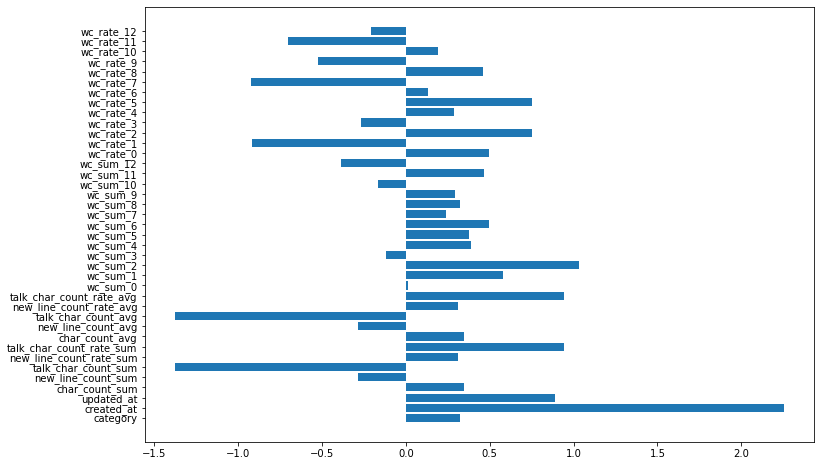

In [44]:
_, ax = plt.subplots(figsize=(12, 8))
ax.barh(feature_names, model.coef_[0])
plt.show()